# Trabalho de Feature Engineering no dataset da Quantum Finance

## Descrição

&emsp;Utilizando todos os conhecimentos apresentados no decorrer da disciplina, utilize o dataset Quantum Finance para manipular os dados que futuramente serão utilizados por um modelo de Machine Learning para realizar predições a respeito do Score.

&emsp;O resultado da entrega deverá ser um arquivo python com toda a manipulação de dados realizada. O arquivo python deverá conter comentários para facilitar o entendimento no código, de preferência, o arquivo poderá ser entregue em formato .ipynb (Jupyter Notebook).

# Dataset "Base ScoreCredito QuantumFinance"
| Variáveis           | Descrição                        | Categorias                               |
|---------------------|----------------------------------|------------------------------------------|
| id                  | ID                               |                                          |
| idade               | Idade em anos                    |                                          |
| sexo                | Sexo                             | F = Feminino                             |
|                     |                                  | M=Masculino                              |
| estado_civil        | Estado civil                     | Solteiro                                 |
|                     |                                  | Casado                                   |
|                     |                                  | Divorciado                               |
| escola              | Grau de Instrução                | ensino fundam = até o ensino fundamental |
|                     |                                  | ensino médio                             |
|                     |                                  | Graduação                                |
|                     |                                  | Doutorado                                |
| Qte_dependentes     | Quantidade de dependentes        |                                          |
| tempo_ultimoservico | Tempo de trabalho (meses)        |                                          |
| trabalha            | Trabalha                         | 0=Não                                    |
|                     |                                  | 1=Sim                                    |
| vl_salario_mil      | Sálario                          |                                          |
| reg_moradia         | Região da moradia                | 1=Segmento geográfico A                  |
|                     |                                  | 2=Segmento geográfico B                  |
|                     |                                  | 3=Segmento geográfico C                  |
|                     |                                  | 4=Segmento geográfico D                  |
|                     |                                  | 5=Segmento geográfico E                  |
|                     |                                  | 6=Segmento geográfico F                  |
| casa_propria        | Casa própria                     | 0=Não                                    |
|                     |                                  | 1=Sim                                    |
| vl_imovel_em_mil    | Valor do imóvel (R$)             |                                          |
| Qte_cartoes         | Quantidade de cartões de crédito |                                          |
| Qte_carros          | Quantidade de carros             |                                          |
| SCORE_CREDITO       | Credit Scorging                  |                                          |


# Importando bibliotecas

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  mean_squared_error, mean_absolute_error, r2_score

# Carregando o dataframe

In [46]:
df_bruto = pd.read_csv('/content/Base_ScoreCredito_QuantumFinance.csv', sep=';', decimal=',')
df = pd.read_csv('/content/Base_ScoreCredito_QuantumFinance.csv', sep=';', decimal=',')
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


# Analise exploratória

In [47]:
df.info()

# confirmando quantidade de registros importados em cada coluna, existência de dados nulos e tipo de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


In [48]:
df.describe()

# mesmo sendo variáveis numéricas, podemos constatar que as variáveis trabalha e casa_propria são categóricas / booleanas

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,1.547447,34.133208,0.911919,70.209002,3.783450,0.352424,208.999111,1.083638,0.623383,469.500364
std,3.690378e+07,8.016814,1.489079,8.221428,0.283427,55.567032,1.580486,0.477749,378.495229,0.333784,0.569796,133.814653
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,7.130368e+08,41.000000,0.000000,30.000000,1.000000,21.330536,3.000000,0.000000,0.000000,1.000000,0.000000,375.000000
50%,7.179264e+08,46.000000,1.000000,34.000000,1.000000,66.486331,4.000000,0.000000,0.000000,1.000000,1.000000,449.600000
75%,7.731435e+08,52.000000,3.000000,39.000000,1.000000,107.544225,5.000000,1.000000,289.000000,1.000000,1.000000,540.900000
max,8.283431e+08,73.000000,5.000000,57.000000,1.000000,233.301793,6.000000,1.000000,1800.000000,4.000000,2.000000,979.650000


In [49]:
print (f'Totais de entradas no Dataframe: {df.shape[0]}')

# quantidade de respostas únicas por variável
df.nunique()


Totais de entradas no Dataframe: 10127


,0
id,10127
idade,45
sexo,2
estado_civil,4
escola,5
Qte_dependentes,6
tempo_ultimoservico,50
trabalha,2
vl_salario_mil,9236
reg_moradia,6


## Verificando se há dados dupicados

In [50]:
print("\n### Dados Duplicados ###")
duplicates = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicates}")


### Dados Duplicados ###
Total de registros duplicados: 0


Não identificamos entradas duplicadas.

## Identificação de Outliers


### Outliers ###


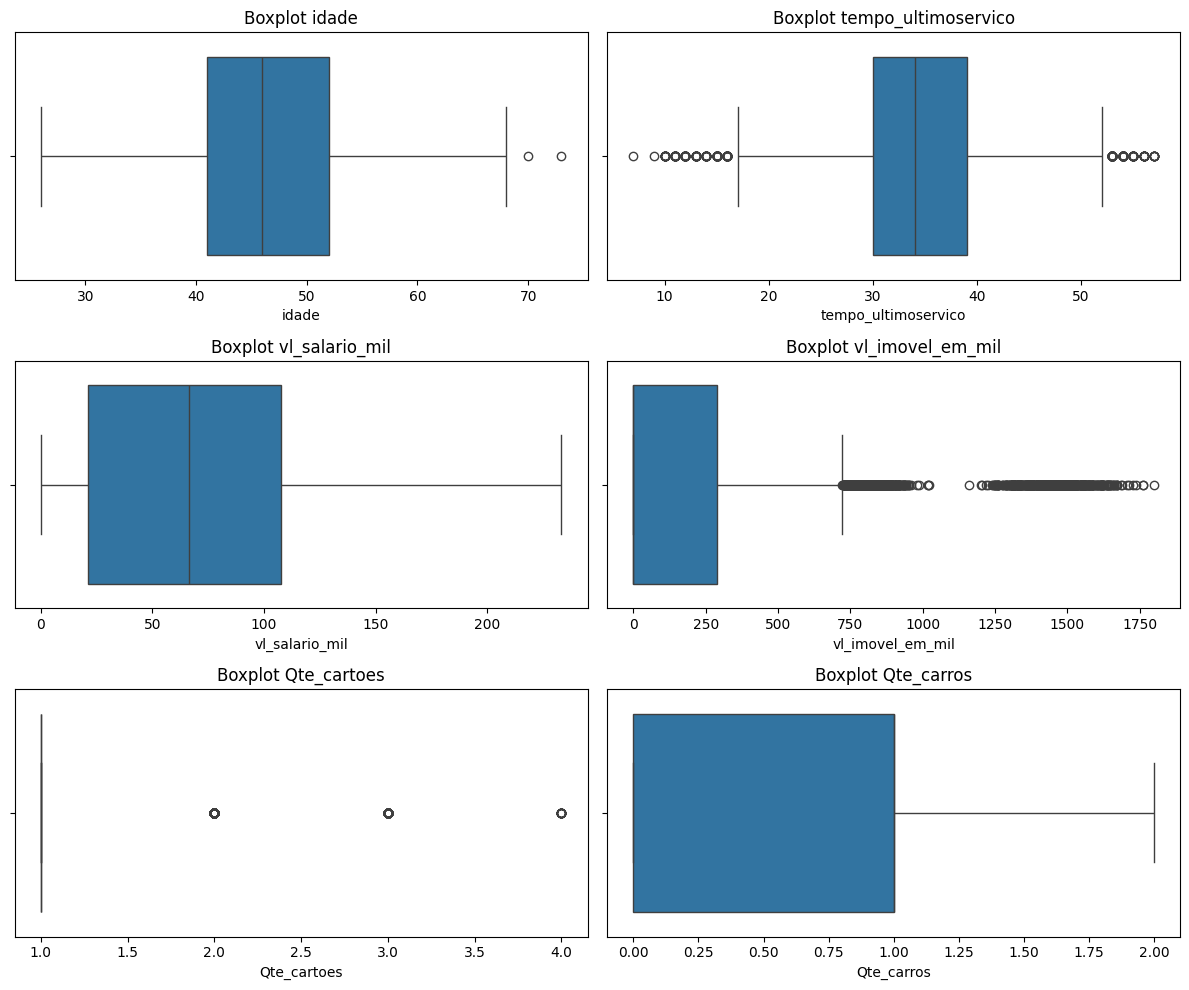

In [51]:
i=1
print("\n### Outliers ###")
plt.figure(figsize=(12, 10))
for frame in ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']:
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[frame])
    plt.title('Boxplot ' + frame)
    i+=1
plt.tight_layout()
plt.show()

Identificamos outliers em:

**Idade**: Apenas duas entradas apresentam valor acima do 95o percentil<br>
**Tempo de Serviço**: Algumas entradas abaixo do 5o percentil e algumas acima do 95o percentil <br>
**Valor do Imovel**: Identificamos muitas entradas com valor 0 devido ao individuo não ter imovel próprio<br>
**Quantidade de Cartões**: A maioria das pessoas possui um ou nenhum cartão<br>

Vamos manter todas as variáveis até o momento de verificar a importancia de cada uma delas.


### Outliers ###


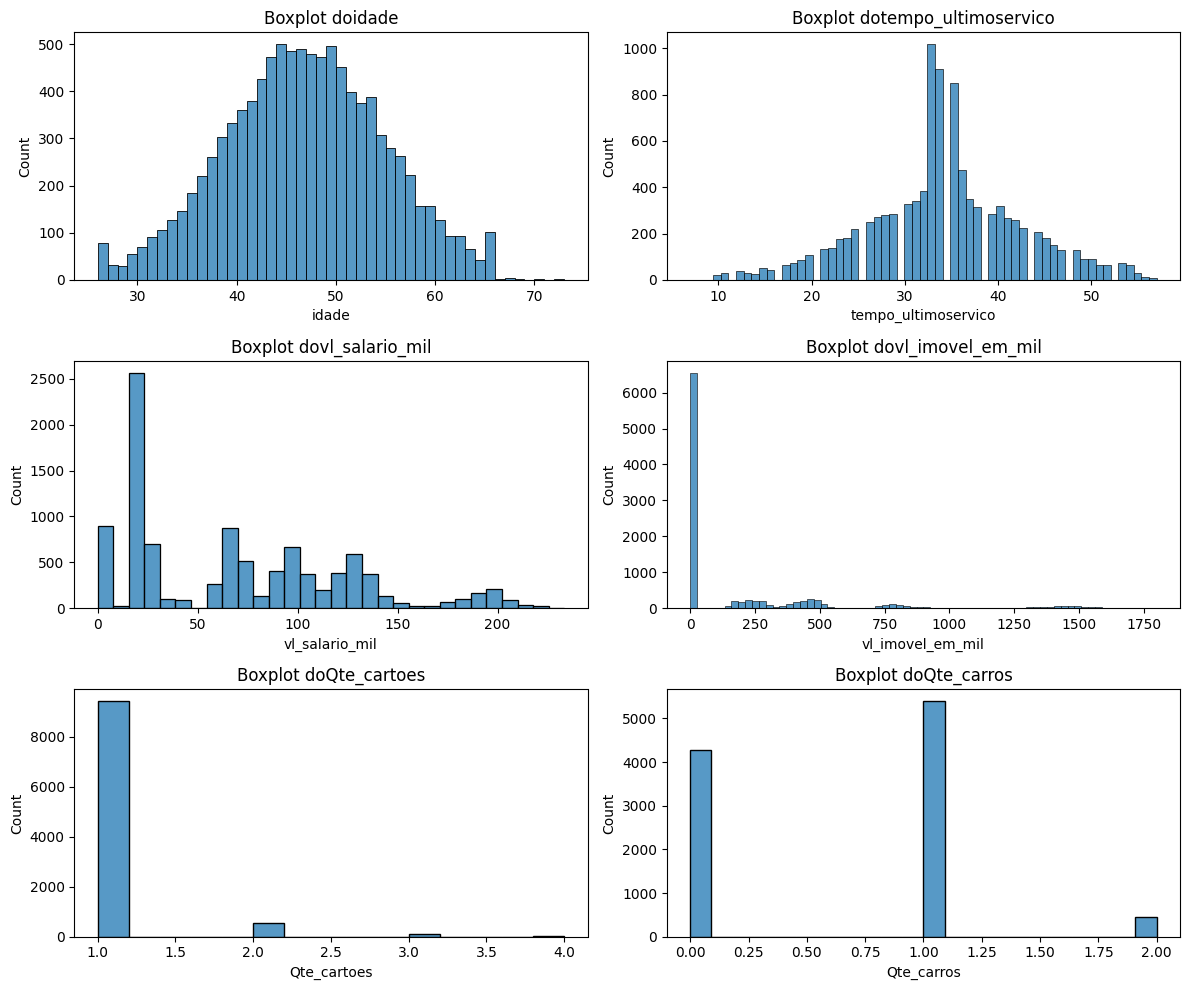

In [52]:
i=1
print("\n### Outliers ###")
plt.figure(figsize=(12, 10))
for frame in ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']:
    plt.subplot(3, 2, i)
    sns.histplot(x=df[frame])
    plt.title('Boxplot do' + frame)
    i+=1
plt.tight_layout()
plt.show()

# Limpando base

Identificamos que a Coluna id só tem entradas unicas, essa coluna não se'ra usada para analise

In [53]:
df.drop('id', axis=1, inplace=True)

df_bruto.drop('id', axis=1, inplace=True)

In [71]:
# tirando os registros preenchidos como "na"

df_bruto.groupby('estado_civil').count()

# Como teste, iremos preencher os dados de estado civil faltantes como "casado", dado que é a característica mais comum da base

df_bruto['estado_civil'] = df_bruto['estado_civil'].replace('na', 'casado')
df_bruto.groupby('estado_civil').count()

,idade,sexo,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
estado_civil,,,,,,,,,,,,,
casado,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436
divorciado,748,748,748,748,748,748,748,748,748,748,748,748,748
solteiro,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943


# Tratamento de dados categóricos

In [76]:
# tratando variáveis categóricas na base "original"

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
bruto_encoded = one_hot_encoder.fit_transform(df_bruto[['sexo', 'estado_civil', 'escola']])

# Convertendo o resultado para um DataFrame
db_bruto_categoricas = pd.DataFrame(bruto_encoded, columns=one_hot_encoder.get_feature_names_out(['sexo', 'estado_civil', 'escola']))

# juntando variável tratada com o restante do dataframe
db_bruto_categoricas_encoded = df_bruto.drop(columns=['sexo', 'estado_civil', 'escola'])

db_bruto_categoricas_encoded.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,45,3,40,1,40.089665,3,0,0,1,1,778.0
1,58,0,44,1,66.557645,3,0,0,1,0,276.3
2,46,3,35,1,123.681821,6,0,0,1,1,401.0
3,34,0,22,1,19.715934,6,0,0,1,0,347.4
4,49,2,36,0,0.000000,3,1,437,1,2,476.0


In [56]:
# Copiar dataset
one_hot_encoded_df = df

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df[['sexo']])

# # Convertendo o resultado para um DataFrame
one_hot_encoded_df[one_hot_encoder.get_feature_names_out(['sexo'])] = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['sexo']))
one_hot_encoded_df = one_hot_encoded_df.drop(columns=['sexo'])

one_hot_encoded_df.head()

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M
0,45,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0,0.0
1,58,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3,1.0
2,46,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0,1.0
3,34,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4,0.0
4,49,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0,0.0


In [57]:
df['escola'].unique()

array(['graduacao', 'ensino fundam', 'doutorado', 'mestrado',
       'ensino medio'], dtype=object)

In [58]:
# Copiar dataset
escola_one_hot_ordinal_df = one_hot_encoded_df

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['ensino fundam', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']])
escola_one_hot_ordinal_df['escola_Ordinal'] = ordinal_encoder.fit_transform(escola_one_hot_ordinal_df[['escola']])
escola_one_hot_ordinal_df = escola_one_hot_ordinal_df.drop(columns=['escola'])
escola_one_hot_ordinal_df.head()

,idade,estado_civil,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,escola_Ordinal
0,45,casado,3,40,1,40.089665,3,0,0,1,1,778.0,0.0,2.0
1,58,solteiro,0,44,1,66.557645,3,0,0,1,0,276.3,1.0,0.0
2,46,divorciado,3,35,1,123.681821,6,0,0,1,1,401.0,1.0,4.0
3,34,solteiro,0,22,1,19.715934,6,0,0,1,0,347.4,0.0,3.0
4,49,casado,2,36,0,0.000000,3,1,437,1,2,476.0,0.0,3.0


In [59]:
escola_one_hot_ordinal_df['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado', 'na'], dtype=object)

In [60]:
# Copiar dataset
estado_civil_dropna_one_hot_ordinal_df = escola_one_hot_ordinal_df.copy()
estado_civil_dropna_one_hot_ordinal_df = estado_civil_dropna_one_hot_ordinal_df[estado_civil_dropna_one_hot_ordinal_df['estado_civil'] != 'na']

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['solteiro', 'casado', 'divorciado']])
estado_civil_dropna_one_hot_ordinal_df['estado_civil_Ordinal'] = ordinal_encoder.fit_transform(estado_civil_dropna_one_hot_ordinal_df[['estado_civil']])
estado_civil_dropna_one_hot_ordinal_df = estado_civil_dropna_one_hot_ordinal_df.drop(columns=['estado_civil'])
estado_civil_dropna_one_hot_ordinal_df.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,escola_Ordinal,estado_civil_Ordinal
0,45,3,40,1,40.089665,3,0,0,1,1,778.0,0.0,2.0,1.0
1,58,0,44,1,66.557645,3,0,0,1,0,276.3,1.0,0.0,0.0
2,46,3,35,1,123.681821,6,0,0,1,1,401.0,1.0,4.0,2.0
3,34,0,22,1,19.715934,6,0,0,1,0,347.4,0.0,3.0,0.0
4,49,2,36,0,0.000000,3,1,437,1,2,476.0,0.0,3.0,1.0


In [61]:
# Copiar dataset
estado_civil_one_hot_ordinal_df = escola_one_hot_ordinal_df.copy()

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['na', 'solteiro', 'casado', 'divorciado']])
estado_civil_one_hot_ordinal_df['estado_civil_Ordinal'] = ordinal_encoder.fit_transform(estado_civil_one_hot_ordinal_df[['estado_civil']])
estado_civil_one_hot_ordinal_df = estado_civil_one_hot_ordinal_df.drop(columns=['estado_civil'])
estado_civil_one_hot_ordinal_df.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,escola_Ordinal,estado_civil_Ordinal
0,45,3,40,1,40.089665,3,0,0,1,1,778.0,0.0,2.0,2.0
1,58,0,44,1,66.557645,3,0,0,1,0,276.3,1.0,0.0,1.0
2,46,3,35,1,123.681821,6,0,0,1,1,401.0,1.0,4.0,3.0
3,34,0,22,1,19.715934,6,0,0,1,0,347.4,0.0,3.0,1.0
4,49,2,36,0,0.000000,3,1,437,1,2,476.0,0.0,3.0,2.0


# Feature Selecting


## Filtering Method

In [62]:
# Separando as features e o target
X = estado_civil_one_hot_ordinal_df.drop('SCORE_CREDITO', axis=1)
y = estado_civil_one_hot_ordinal_df['SCORE_CREDITO']

# Aplicando o SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_Kbest_np = selector.fit_transform(X, y)
X_Kbest = X[X.columns[selector.get_support()]]

# Resultados das pontuações das features
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
scores.sort_values(by='Score', ascending=False)

,Score
trabalha,14.566304
vl_imovel_em_mil,5.597704
Qte_dependentes,4.942935
vl_salario_mil,3.404267
estado_civil_Ordinal,3.087679
Qte_cartoes,2.989219
tempo_ultimoservico,2.329240
Qte_carros,1.794778
reg_moradia,1.702522
casa_propria,1.633116


In [63]:
X_dropna = estado_civil_dropna_one_hot_ordinal_df.drop('SCORE_CREDITO', axis=1)
y_dropna = estado_civil_dropna_one_hot_ordinal_df['SCORE_CREDITO']

# Aplicando o SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_Kbest_np_dropna = selector.fit_transform(X_dropna, y_dropna)
X_Kbest_dropna = X_dropna[X_dropna.columns[selector.get_support()]]

# Resultados das pontuações das features
scores_dropna = pd.DataFrame(selector.scores_, index=X_dropna.columns, columns=['Score'])
scores_dropna.sort_values(by='Score', ascending=False)

,Score
trabalha,13.883351
estado_civil_Ordinal,13.828074
vl_imovel_em_mil,5.455683
Qte_dependentes,4.928206
vl_salario_mil,3.234347
Qte_cartoes,2.972459
tempo_ultimoservico,2.268041
Qte_carros,1.778841
reg_moradia,1.653018
casa_propria,1.612401


## Wrapper Method

In [64]:
# Inicializando o classificador e o RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5 )  # Selecionar 5 melhores features
fit = rfe.fit(X, y)
# Resultados do RFE
rfe_features = pd.DataFrame({'Feature': X.columns, 'Rank': fit.ranking_})
rfe_features.sort_values(by='Rank', inplace=True)
rfe_features

# Selecionar as 5 melhores features
# best_features = rfe_features[rfe_features['Rank'] == 1]['Feature']
# X_rfe = X[best_features]

,Feature,Rank
3,trabalha,1
5,reg_moradia,1
8,Qte_cartoes,1
9,Qte_carros,1
10,sexo_M,1
11,escola_Ordinal,2
6,casa_propria,3
1,Qte_dependentes,4
2,tempo_ultimoservico,5
0,idade,6


In [65]:
# Inicializando o classificador e o RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5 )  # Selecionar 5 melhores features
fit = rfe.fit(X_dropna, y_dropna)
# Resultados do RFE
rfe_features_dropna = pd.DataFrame({'Feature': X_dropna.columns, 'Rank': fit.ranking_})
rfe_features_dropna.sort_values(by='Rank', inplace=True)
rfe_features_dropna

# Selecionar as 5 melhores features
# best_features = rfe_features[rfe_features['Rank'] == 1]['Feature']
# X_rfe = X[best_features]

,Feature,Rank
3,trabalha,1
5,reg_moradia,1
8,Qte_cartoes,1
9,Qte_carros,1
10,sexo_M,1
12,estado_civil_Ordinal,2
6,casa_propria,3
11,escola_Ordinal,4
2,tempo_ultimoservico,5
1,Qte_dependentes,6


## Embedded Method


In [66]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)


# Importância das features
importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importance.sort_values(by='Importance', ascending=False)

# Selecionando as 5 features mais importantes
# top_features = importance.head(5)['Feature']
# X_embedded_features = X[top_features]

,Feature,Importance
7,vl_imovel_em_mil,0.348150
4,vl_salario_mil,0.298259
2,tempo_ultimoservico,0.116730
0,idade,0.065872
9,Qte_carros,0.062019
8,Qte_cartoes,0.037352
1,Qte_dependentes,0.018003
11,escola_Ordinal,0.016553
12,estado_civil_Ordinal,0.014862
5,reg_moradia,0.014001


In [67]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_dropna, y_dropna)


# Importância das features
importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
7,vl_imovel_em_mil,0.345656
4,vl_salario_mil,0.300605
2,tempo_ultimoservico,0.117977
0,idade,0.064402
9,Qte_carros,0.060930
8,Qte_cartoes,0.036661
5,reg_moradia,0.016614
1,Qte_dependentes,0.016470
11,escola_Ordinal,0.015504
12,estado_civil_Ordinal,0.015196


# Treinando modelos e comparando resultados

## Base bruta / sem tratamento

In [98]:
# separando variáveis X e Y
X_bruto = db_bruto_categoricas_encoded.drop('SCORE_CREDITO', axis=1)
y_bruto = db_bruto_categoricas_encoded['SCORE_CREDITO']

# separando base de teste e treino
X_bruto_train, X_bruto_test, y_bruto_train, y_bruto_test = train_test_split(X_bruto, y_bruto, test_size=0.2, random_state=42)

#treinando modelo
modelo_bruto = LinearRegression()
modelo_bruto.fit(X_bruto_train, y_bruto_train)
print('Score do treino: ', modelo_bruto.score(X_bruto_train, y_bruto_train))

y_pred_bruto = modelo_bruto.predict(X_bruto_test)


# Calculate regression metrics
mse = mean_squared_error(y_bruto_test, y_pred_bruto)
rmse = mean_squared_error(y_bruto_test, y_pred_bruto, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_bruto_test, y_pred_bruto)
r2 = r2_score(y_bruto_test, y_pred_bruto)

print(f"MSE base bruta: {mse}")
print(f"RMSE base bruta: {rmse}")
print(f"MAE base bruta: {mae}")
print(f"R-squared base bruta: {r2}")


Score do treino:  0.6611189395198316
MSE base bruta: 6734.657980636062
RMSE base bruta: 82.06496195475913
MAE base bruta: 62.53245588436437
R-squared base bruta: 0.6156696434644353


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Base "estado_civil_one_hot_ordinal_df

In [99]:
estado_civil_one_hot_ordinal_df

# separando variáveis X e Y
X_hot_ordinal = estado_civil_one_hot_ordinal_df.drop('SCORE_CREDITO', axis=1)
y_hot_ordinal = estado_civil_one_hot_ordinal_df['SCORE_CREDITO']

# separando base de teste e treino
X_ordinal_train, X_ordinal_test, y_ordinal_train, y_ordinal_test = train_test_split(X_hot_ordinal, y_hot_ordinal, test_size=0.2, random_state=42)

#treinando modelo
modelo_ordinal = LinearRegression()
modelo_ordinal.fit(X_ordinal_train, y_ordinal_train)
print('Score do treino: ', modelo_ordinal.score(X_ordinal_train, y_ordinal_train))

y_pred_ordinal = modelo_ordinal.predict(X_ordinal_test)


# Calculate regression metrics
mse = mean_squared_error(y_ordinal_test, y_pred_ordinal)
rmse = mean_squared_error(y_ordinal_test, y_pred_ordinal, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_ordinal_test, y_pred_ordinal)
r2 = r2_score(y_ordinal_test, y_pred_ordinal)

print(f"MSE base bruta: {mse}")
print(f"RMSE base bruta: {rmse}")
print(f"MAE base bruta: {mae}")
print(f"R-squared base bruta: {r2}")



Score do treino:  0.6645094932378057
MSE base bruta: 6673.88905594392
RMSE base bruta: 81.69387404171698
MAE base bruta: 62.15129453383972
R-squared base bruta: 0.6191375764404478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Analise do resultado dos dois modelos

**Comparação e Interpretação** <br>
Score do Treino: Ambos os modelos têm scores de treino semelhantes, com o Modelo 2 ligeiramente superior (0.6645 vs. 0.6611). Isso indica que o Modelo 2 tem um ajuste um pouco melhor aos dados de treino. <br><br>
MSE e RMSE: O Modelo 2 apresenta valores ligeiramente menores de MSE (6673.89 vs. 6734.66) e RMSE (81.69 vs. 82.06). Valores menores de MSE e RMSE indicam que o Modelo 2 tem um desempenho melhor em termos de precisão das previsões. <br> <br>
MAE: O Modelo 2 também tem um MAE menor (62.15 vs. 62.53), o que sugere que, em média, os erros absolutos das previsões do Modelo 2 são menores. <br> <br>
R-squared: O coeficiente de determinação do Modelo 2 é ligeiramente maior (0.6191 vs. 0.6157), indicando que ele explica uma proporção um pouco maior da variabilidade dos dados em comparação com o Modelo 1. <br><br>
**Conclusão** <br><br>
Com base nas métricas fornecidas, o Modelo 2 parece ser ligeiramente superior ao Modelo 1 em termos de ajuste aos dados de treino e precisão das previsões, no entanto, as diferenças são pequenas.